In [1]:
import os
import json
import torch

from agents.dqn import DQN
from env import ENVIRONMENT_REGISTRY

In [17]:
# run_name = "Graphormer-complex-n150-k0-hd64-layers3-lr0.0001-heads4-bs128-p1-g0.5-tuf8000-UHXQQ"
run_name = "Graphormer-complex-n6-k3-hd128-layers4-lr0.0004-heads4-bs64-p1-g1.0-tuf100000-BAIUN"

# Find directory of run
if os.path.exists(
    os.path.join("results", "dqn", "friedkin-johnson", "runs", run_name)
):
    run_dir = os.path.join("results", "dqn", "friedkin-johnson", "runs", run_name)
else:
    run_dir = os.path.join("results", "dqn", "nonlinear", "runs", run_name)

# Load parameters
with open(os.path.join(run_dir, "params_env.json"), "r") as f:
    params_env = json.load(f)
with open(os.path.join(run_dir, "params_agent.json"), "r") as f:
    params_agent = json.load(f)

env = ENVIRONMENT_REGISTRY[params_env["environment"]](**params_env)
agent = DQN(**params_agent)

# Load saved model weights
q_net_path = os.path.join(run_dir, "q_network_params.pth")
target_net_path = os.path.join(run_dir, "target_network_params.pth")

# Load model weights into agent
agent.q_network.load_state_dict(
    torch.load(q_net_path, map_location=torch.device("cpu"))
)
agent.target_network.load_state_dict(
    torch.load(target_net_path, map_location=torch.device("cpu"))
)



<All keys matched successfully>

In [18]:
import networkx as nx
from torch_geometric.utils import from_networkx

G = nx.cycle_graph(6)
# nx.draw(cycle_graph, with_labels=True)
sigma = [1, 1, 1, -1, 1, -1]
tau = None
polarization, influence_matrix =env.polarization(G, sigma, return_influence_matrix=True)

start_state = {
            "graph": G,
            "sigma": sigma,
            "tau": tau,
            "edges_left": 3,
            "polarization": polarization,
            "influence_matrix": influence_matrix,
            "graph_data": from_networkx(G),
        }

q_values: tensor([0.1448, 0.2323, 0.1448, 0.2346, 0.1206, 0.2346])
q_values: tensor([-0.0134,  0.0013, -0.2321, -0.0728, -0.1144, -0.0817])
q_values: tensor([0.0570, 0.1060, 0.1013, 0.0413, 0.0432, 0.1187])
q_values: tensor([0.0165, 0.1290, 0.1324, 0.0744, 0.0812, 0.0898])
q_values: tensor([0.0447, 0.0358, 0.0013, 0.0359, 0.0131, 0.0184])
q_values: tensor([-0.0021, -0.0035, -0.0003,  0.0380,  0.0021, -0.2942])


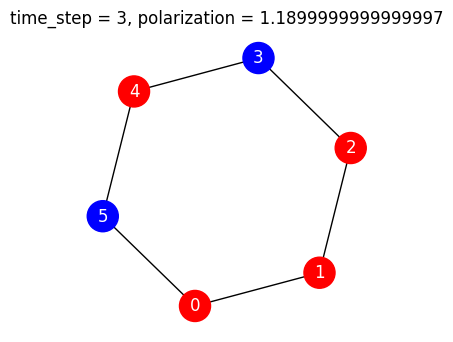

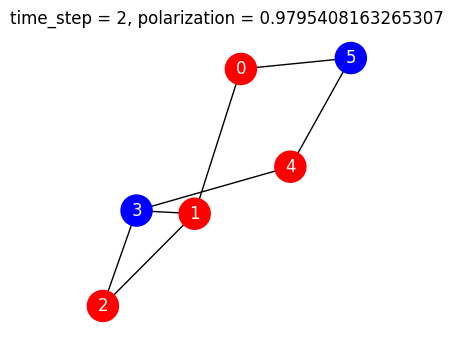

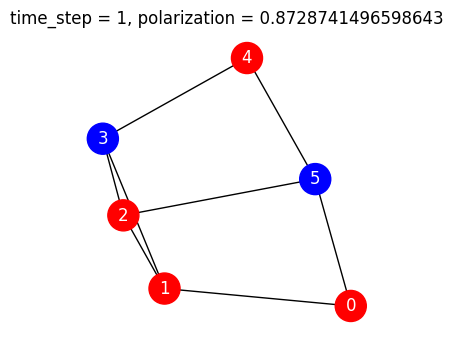

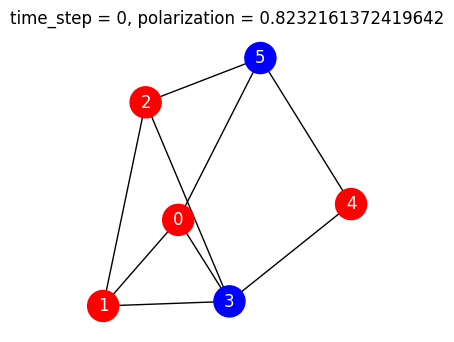

In [19]:
import matplotlib.pyplot as plt

current_state = start_state
terminal = env.is_terminal(current_state)
while True:
    G = current_state["graph"]
    sigma = current_state["sigma"]
    tau = current_state["tau"]
    l = current_state["edges_left"]
    if tau is None:
        polarization = env.polarization(G, sigma)
        pos = nx.spring_layout(G)  # Generate positions for visualization
        color_map = ['red' if sigma[node]==1 else 'blue' for node in G.nodes()]
        plt.figure(figsize=(3, 3))
        nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=500, font_color='white')
        plt.title(f"time_step = {l}, polarization = {polarization}") 
    if terminal:
        break
    action, q_values = agent.policy_greedy(current_state, return_q_values=True)
    print("q_values:", q_values)
    next_state, _, terminal = env.step(action, current_state)
    current_state = next_state

In [5]:
folder = "test"

with open(os.path.join("data", params_env["environment"], folder, f"start_states_{folder}_n{params_env['n']}_d{params_env['average_degree']}.pt"), "rb") as f:
    test_states = torch.load(f, weights_only=False)

In [6]:
state = test_states[0]

In [ ]:
state[]

dict_keys(['graph', 'sigma', 'tau', 'edges_left', 'polarization', 'influence_matrix', 'graph_data'])

In [17]:
q_values_list= []

for k in range(params_env["k"]):
    state["edges_left"] = k +1
    action, q_values = agent.policy_greedy(state, give_q_valaues=True)
    q_values_list.append(q_values)


In [18]:
import numpy as np

max_diff = 0
max_pair = (None, None)

for i in range(1, k):
    for j in range(i+1, k):
        diff = np.abs(q_values_list[i] - q_values_list[j]).sum()
        if diff > max_diff:
            max_diff = diff
            max_pair = (i, j)

print(f"Maximum absolute difference: {max_diff:.6f} between indices {max_pair[0]} and {max_pair[1]}")

Maximum absolute difference: 47.943352 between indices 1 and 13


/tmp/ipykernel_3629018/1045115880.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  diff = np.abs(q_values_list[i] - q_values_list[j]).sum()


In [ ]:
i,j = 

np.abs(q_values_list[i] - q_values_list[j])

/tmp/ipykernel_3629018/2689665621.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  np.abs(q_values_list[i] - q_values_list[j])


tensor([0.0539, 0.0537, 0.0537, 0.0543, 0.0520, 0.0514, 0.0530, 0.0560, 0.0533,
        0.0544, 0.0527, 0.0537, 0.0538, 0.0530, 0.0521, 0.0535, 0.0543, 0.0569,
        0.0545, 0.0562, 0.0553, 0.0538, 0.0548, 0.0552, 0.0546, 0.0545, 0.0590,
        0.0546, 0.0545, 0.0541, 0.0554, 0.0575, 0.0575, 0.0551, 0.0540, 0.0570,
        0.0552, 0.0549, 0.0530, 0.0574, 0.0542, 0.0571, 0.0548, 0.0539, 0.0582,
        0.0549, 0.0566, 0.0537, 0.0587, 0.0522, 0.0559, 0.0545, 0.0534, 0.0570,
        0.0598, 0.0555, 0.0583, 0.0551, 0.0574, 0.0558, 0.0601, 0.0576, 0.0589,
        0.0566, 0.0541, 0.0542, 0.0546, 0.0562, 0.0566, 0.0537, 0.0577, 0.0578,
        0.0538, 0.0543, 0.0559, 0.0547, 0.0552, 0.0578, 0.0539, 0.0587, 0.0551,
        0.0575, 0.0558, 0.0557, 0.0557, 0.0558, 0.0538, 0.0583, 0.0559, 0.0523,
        0.0597, 0.0535, 0.0570, 0.0545, 0.0565, 0.0544, 0.0544, 0.0575, 0.0560,
        0.0545, 0.0524, 0.0560, 0.0528, 0.0516, 0.0570, 0.0572, 0.0542, 0.0542,
        0.0592, 0.0586, 0.0582, 0.0570, 

In [17]:
agent.policy_greedy(state)

7

In [8]:
new_state, _, _ = env.step(state = state, action=10)


In [29]:
q_value_list = []
for _ in range(10):
    action, q_values = agent.policy_greedy(new_state, give_q_valaues=True)
    if new_state["tau"] is not None:
        print(f"tau: {new_state['tau']}, opinion: {new_state['sigma'][new_state['tau']]:.4f}")
        q_value_list.append(q_values.numpy())
        print(f"action: {action}, opinion: {new_state['sigma'][action]:.4f}")
        print(f"influence: {new_state['influence_matrix'][new_state['tau'], action]:.4f}")
        print(f"connected: {new_state['graph'].has_edge(new_state['tau'], action)}")
        print("------------")
    new_state, _, _ = env.step(state = new_state, action=action)

tau: 19, opinion: 1.5091
action: 15, opinion: -3.5225
influence: 0.0295
connected: False
------------
tau: 19, opinion: 1.5089
action: 14, opinion: 0.1551
influence: 0.0392
connected: True
------------
tau: 19, opinion: 1.5088
action: 14, opinion: 0.1542
influence: 0.0287
connected: False
------------
tau: 19, opinion: 1.5085
action: 21, opinion: 0.0532
influence: 0.0426
connected: True
------------
tau: 19, opinion: 1.5084
action: 21, opinion: 0.0526
influence: 0.0325
connected: False
------------


In [125]:
import copy

q_value_list = []
states = []
states_deep = []
for _ in range(10):
    action, q_values = agent.policy_greedy(new_state, give_q_valaues=True)
    new_state, _, _ = env.step(state = new_state, action=action)
    states.append(new_state)
    states_deep.append(copy.deepcopy(new_state))
    for i in range(len(states)):
        if not (states[i]["influence_matrix"] == states_deep[i]["influence_matrix"]).all():
            print("not equal!")
        if not states[i]["graph"].edges() == states_deep[i]["graph"].edges():
            print("not equal graph!")
        if not (states[i]["sigma"] == states_deep[i]["sigma"]):
            print("not equal sigma!")
        if states[i]["tau"] != states_deep[i]["tau"]:
            print("not equal tau!")
        _, influence_matrix = env.polarization(
            states_deep[i]["graph"], states_deep[i]["sigma"], keep_influence_matrix=True
        )
        if not (states_deep[i]["influence_matrix"] == influence_matrix).all():
            print("not equal influence matrix!")

In [120]:
(states[0]["influence_matrix"] == states_deep[0]["influence_matrix"]).all()

np.True_

In [116]:
import networkx as nx

edges_states = set(states[0]["graph"].edges())
edges_states_deep = set(states_deep[0]["graph"].edges())

edges_only_in_states = edges_states - edges_states_deep
edges_only_in_states_deep = edges_states_deep - edges_states

print("Edges only in states[0][\"graph\"]:", edges_only_in_states)
print("Edges only in states_deep[0][\"graph\"]:", edges_only_in_states_deep)

Edges only in states[0]["graph"]: set()
Edges only in states_deep[0]["graph"]: set()


In [75]:
new_state["tau"]

20

In [82]:
new_state["graph"].has_edge(new_state["tau"], 10)

False

In [77]:
next_state, _, _ = env.step(state = new_state, action=10)

In [81]:
next_state["graph"].has_edge(new_state["tau"], 10)

True

In [30]:
len(q_value_list)
i=2

q_value_list[i]-q_value_list[i+1]

array([-2.49072909e-05, -2.97389925e-05,  3.07746232e-05, -2.63378024e-05,
       -2.19345093e-05, -1.05015934e-05,  2.39275396e-05, -3.23727727e-06,
       -3.17506492e-05, -1.17868185e-05, -1.55642629e-05,  2.04518437e-05,
        1.12466514e-05, -1.92187726e-05,  6.17876649e-05, -5.06639481e-06,
       -2.60584056e-05,  6.94394112e-06, -2.58199871e-05, -3.50289047e-05,
       -2.69301236e-05, -1.13397837e-05, -2.83494592e-06, -2.44379044e-06,
       -2.54586339e-05], dtype=float32)

In [86]:
new_state["tau"]

20

In [22]:
list(new_state["graph"].neighbors(new_state["tau"]))

[82, 83, 84, 87, 88, 130]

In [52]:
new_state["tau"] = 20
new_state["graph"].remove_edge(new_state["tau"], 10)

In [87]:
new_state["graph"].has_edge(new_state["tau"], 10)

False

In [99]:
state_1 = new_state.copy()

state_2 = new_state.copy()
state_2["graph"] = new_state["graph"].copy()
state_2["graph"].add_edge(state_2["tau"], 10)
_, state_2["influence_matrix"] = env.polarization(
    state_2["graph"], state_2["sigma"], keep_influence_matrix=True
)

In [101]:
state_2["graph"].has_edge(20, 10)


True

In [96]:
state_1["tau"]

20

In [106]:
state_1["influence_matrix"][state_2["tau"], 10] - state_2["influence_matrix"][state_2["tau"], 10]

np.float64(-0.022951210310512976)

In [108]:
state_1["influence_matrix"][state_2["tau"], 3] - state_2["influence_matrix"][state_2["tau"], 3]

np.float64(-0.001412126433256753)

In [102]:


action_a, q_values_a = agent.policy_greedy(state_1, give_q_valaues=True)
print(q_values_a[10])

action_b, q_values_b = agent.policy_greedy(state_2, give_q_valaues=True)
print(q_values_b[10] - q_values_a[10])


# print(f"action a: {action_a}, q-value: {q_values_a[action_a]:.4f}")
# print(f"action b: {action_b}, q-value: {q_values_b[action_b]:.4f}")

# q_values_a-q_values_b

tensor(0.0084)
tensor(-3.3967e-05)


In [103]:
q_values_a-q_values_b

tensor([1.5862e-04, 1.0468e-04, 1.5494e-04, 1.6586e-04, 1.5870e-04, 2.7613e-04,
        2.7766e-04, 1.8785e-04, 1.7016e-04, 3.0415e-04, 3.3967e-05, 3.3998e-04,
        3.0028e-04, 2.8304e-04, 2.7713e-04, 6.9220e-05, 1.0245e-04, 2.8350e-04,
        1.4885e-04, 2.5722e-04, 7.6663e-05, 2.7640e-04, 1.4079e-04, 2.7892e-04,
        1.5984e-04])